# Лабораторная работа №1
## Выполнил студент группы БВТ2102 Гаджиявов Джамал

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [1]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [20]:
import random
import time

In [21]:
user_m = int(input())
user_n = int(input())
user_min_limit = int(input())
user_max_limit = int(input())
user_m, user_n, user_min_limit, user_max_limit

matrix = [[random.randint(user_min_limit, user_max_limit) for i in range(user_n)] for i in range(user_m)]

 1000
 1000
 7
 999


### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [22]:
import copy

In [23]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
# O(n^2) - время
# O(1) - дополнительная память
def select_sort(A):
    for i in range(len(A) - 1):
            min_index = i
            for k in range(i + 1, len(A)):
                if A[k] < A[min_index]:
                    min_index = k
            A[i], A[min_index] = A[min_index], A[i]
    return A
start_time = time.time()
for A in copy.deepcopy(matrix):
    select_sort(A)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 22903 ms ---


In [24]:
# Сортировка вставкой.
# Сортировка вставками — это алгоритм сортировки массивов, в котором на каждой итерации
# первый элемент исходной (неупорядоченной) последовательности помещается в подходящее место 
# среди ранее упорядоченных элементов готовой (отсортированной) последовательности.
# O(n^2) - время
# O(1) - дополнительная память
def insert_sort(A):
    for i in range(1, len(A)):
            key = A[i]
            j = i-1
            while j >=0 and key < A[j] :
                A[j+1] = A[j]
                j -= 1
            A[j+1] = key 
    return A
start_time = time.time()
for A in copy.deepcopy(matrix):
    insert_sort(A)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 30897 ms ---


In [25]:
# Сортировка пузырьком.
# O(n^2) - время
# O(1) - дополнительная память
def bubble_sort(A):
    for i in range(len(A)-1):
        for j in range(len(A)-i-1):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
    return A

start_time = time.time()
for A in copy.deepcopy(matrix):
    bubble_sort(A)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 57918 ms ---


In [26]:
# Сортировка Шелла.
# O((nlogn)^2) - время
# O(1) - дополнительная память
# Усовершествованный алгоритм сортировки вставками
import math
def shell_sort(array):
    n = len(array)
    k = int(math.log2(n))
    interval = 2**k -1
    while interval > 0:
        for i in range(interval, n):
            temp = array[i]
            j = i
            while j >= interval and array[j - interval] > temp:
                array[j] = array[j - interval]
                j -= interval
            array[j] = temp
        k -= 1
        interval = 2**k -1
    return array

start_time = time.time()
for array in copy.deepcopy(matrix):
    shell_sort(array)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 2446 ms ---


In [27]:
# Быстрая сортировка.
# O(n^2) - время
# O(n) - дополнительная память
def quick_sort(array):
    if len(array)> 1:
        pivot=array.pop()
        lst1, equal_lst, lst2 = [], [pivot], []
        for item in array:
            if item == pivot:
                equal_lst += [item]
            elif item > pivot:
                lst1 += [item]
            else:
                lst2 += [item]
        return (quick_sort(lst2) + equal_lst + quick_sort(lst1))
    else:
        return array

start_time = time.time()
for array in copy.deepcopy(matrix):
    quick_sort(array)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
    

--- 1374 ms ---


In [28]:
# Турнирная сортировка.
# O(nlogn) - время
# O(n) - память
start_time = time.time()
class TournamentSort:
    INF = __import__("sys").maxsize

    def __init__(self, arr):
        self.arr = arr
        self.arr_size = len(arr)
        self.depth = math.ceil(math.log2(self.arr_size))
        self.tree_arr = (2 * pow(2, self.depth) - 1) * [self.INF]

    def sort_arr(self):
        sorted_arr = []
        self.set_leaves()
        self.build_tree(0)

        while len(sorted_arr) != self.arr_size:
            sorted_arr.append(self.tree_arr[0])
            first_leaf = pow(2, self.depth) - 1
            i = 0
            while i < first_leaf:
                if self.tree_arr[i] == self.tree_arr[2 * i + 1]:
                    i = 2 * i + 1
                else:
                    i = 2 * i + 2
            self.tree_arr[i] = self.INF

            while i > 0:
                parent = math.ceil(i / 2) - 1
                f_child = i
                if i % 2 == 0:
                    s_child = i - 1
                else:
                    s_child = i + 1

                if self.tree_arr[f_child] < self.tree_arr[s_child]:
                    self.tree_arr[parent] = self.tree_arr[f_child]
                else:
                    self.tree_arr[parent] = self.tree_arr[s_child]
                i = parent

        return sorted_arr

    def set_leaves(self):
        first_leaf = pow(2, self.depth) - 1
        leaves = range(first_leaf, first_leaf + self.arr_size)
        for i, j in enumerate(leaves):
            self.tree_arr[j] = self.arr[i]

    def build_tree(self, idx):
        tree_size = len(self.tree_arr)
        left = 2 * idx + 1
        right = 2 * idx + 2
        if left >= tree_size and right >= tree_size:
            return self.tree_arr[idx]
        self.tree_arr[idx] = min(self.build_tree(left), self.build_tree(right))
        return self.tree_arr[idx]


start_time = time.time()
for A in copy.deepcopy(matrix):
    TournamentSort(A).sort_arr()
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 7313 ms ---


### Вывод


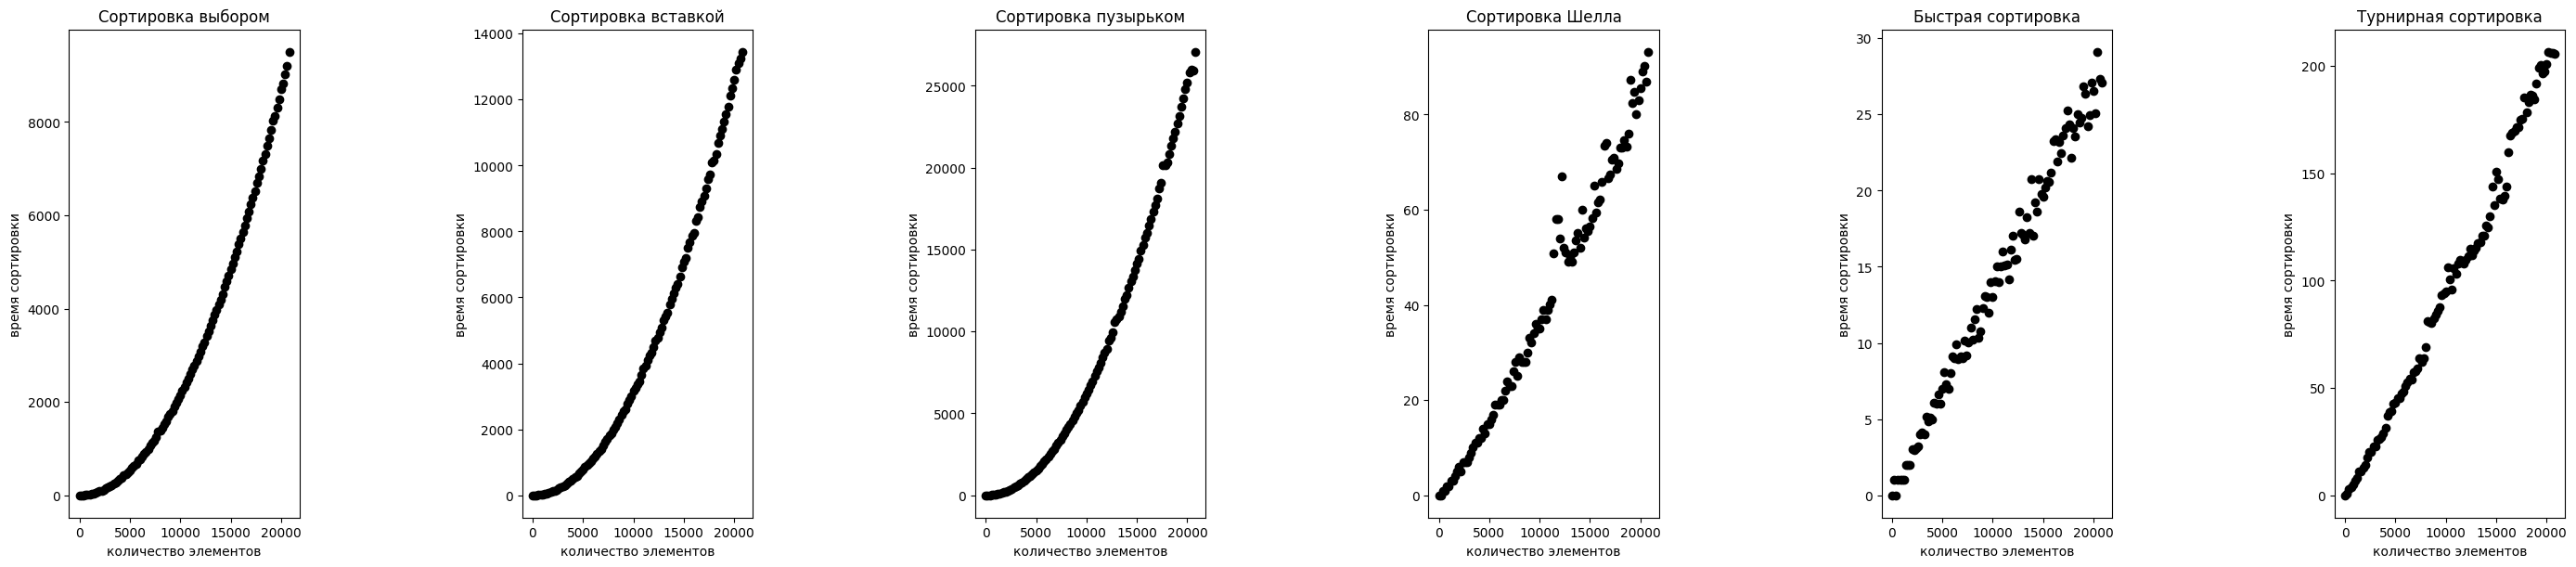

In [90]:
import matplotlib.pyplot as plt
fig, graphs = plt.subplots(1, 6)
fig.tight_layout()
fig.set_size_inches(30, 6)

names = ["Сортировка выбором", "Сортировка вставкой", "Сортировка пузырьком", "Сортировка Шелла", "Быстрая сортировка", "Турнирная сортировка"]
algorithms = [select_sort, insert_sort, bubble_sort, shell_sort, quick_sort, TournamentSort]
dataset = [[random.randint(0, 7777) for _ in range(i)] for i in range(1, 21000, 200)]

for i in range(len(graphs)):
    X = []
    for j in range(len(dataset)):
        start_time = time.time()
        x = algorithms[i](dataset[j].copy())
        if algorithms[i].__name__ == "TournamentSort":
            x.sort_arr()
        X.append((time.time() - start_time)*1000)
    

    graphs[i].plot(range(1, 21000, 200), X, 'o', color='black')
    graphs[i].set_title(names[i])
    graphs[i].set_ylabel("время сортировки")
    graphs[i].set_xlabel("количество элементов")

plt.show()

Мы изучили различные виды сортировок и проверили их эффективность, а также утвердили свои знания об О-нотации при помощи построения графиков зависимости между временем выполнения сортировки и количеством элементов в массиве с использованием библиотеки Matplotlib.